In [ ]:
pip install ml_metrics

  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7845 sha256=9963b3a061ae0476dbe5dee6f8f1db94293134b15a4d6d68dd69c53205ae964c
  Stored in directory: /root/.cache/pip/wheels/56/41/5b/0c6d42b3604a5c823d8922564c4708f84962fa7f2f4facfa6d
Successfully built ml-metrics


In [ ]:
pip install mapclassify


In [ ]:
pip install pysal==2.0.0

     |████████████████████████████████| 24.9 MB 2.0 MB/s 
  Created wheel for pysal: filename=pysal-2.0.0-py3-none-any.whl size=25231765 sha256=ca8aa05ecf1a0907f8f803f51f74610f6c15d955ef11a03c5007c139683818bb
  Stored in directory: /root/.cache/pip/wheels/8d/42/fd/e6187fb8ce1701d471d18be675eb3c6d79353839d8a6094831
Successfully built pysal


In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 15.4 MB 42.0 MB/s 
     |████████████████████████████████| 6.3 MB 60.4 MB/s 


In [ ]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 5.1 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=eb708a00462eed8292ecf5975ca079d106600df0f0239c9526e5f28a9b561983
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [ ]:
pip install stldecompose

#Выгружаем все необходимые библиотеки и модели

In [ ]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import holidays
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import itertools
import random
from datetime import datetime
import sqlite3
import io
import geopandas
import pycountry

import time
from tqdm import tqdm
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go

import scipy.stats as st
from fbprophet.plot import add_changepoints_to_plot, plot_forecast_component
from fbprophet.plot import plot_yearly

from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import pysal
import mapclassify
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from datetime import datetime

from sklearn.metrics import r2_score

from statsmodels.tsa.seasonal import seasonal_decompose
import ml_metrics as metrics
import numpy as np


from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

#installation
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

import statsmodels as sm
con = sqlite3.connect(':memory:')
%matplotlib inline

In [ ]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return str(name)

def select(sql, data):
    for data_ in data: 
        data_.to_sql(get_df_name(data_), con, index = False, if_exists= 'replace')
    return pd.read_sql(sql, con)

In [ ]:
df_submission = pd.read_csv('submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [ ]:
df_submission.head()

ForecastId  ConfirmedCases  Fatalities
0           1               1           1
1           2               1           1
2           3               1           1
3           4               1           1
4           5               1           1

In [ ]:
df_test.head()

ForecastId Province_State Country_Region        Date
0           1            NaN    Afghanistan  2020-04-02
1           2            NaN    Afghanistan  2020-04-03
2           3            NaN    Afghanistan  2020-04-04
3           4            NaN    Afghanistan  2020-04-05
4           5            NaN    Afghanistan  2020-04-06

In [ ]:
df_train.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0

Посмотрим на общую совокупность данных, рассмотрим данные детальнее и основные их характеристики

In [ ]:
num_cols = [
    'Id',
    'Province_State',
    'ConfirmedCases',
    'Fatalities'
]

cat_cols = [
    'Country_Region',
    'Date'
]

#target_col = 'resultMeanValue'

cols = num_cols + cat_cols #+ [target_col]

Расформируем данные по категариальным значениям и численным, чтобы проверить их распределение, какие значения они в принципе могут принимать.

In [ ]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(df_train[col].value_counts())
    print()

Country_Region DISTRIBUTION
US                6210
China             3795
Canada            1380
France            1265
United Kingdom    1265
                  ... 
Colombia           115
Guinea-Bissau      115
Cyprus             115
Albania            115
Bahamas            115
Name: Country_Region, Length: 184, dtype: int64

Date DISTRIBUTION
2020-04-28    313
2020-02-04    313
2020-03-25    313
2020-03-05    313
2020-03-26    313
             ... 
2020-04-15    313
2020-02-11    313
2020-04-26    313
2020-02-08    313
2020-05-10    313
Name: Date, Length: 115, dtype: int64



In [ ]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(df_test[col].value_counts())
    print()

Country_Region DISTRIBUTION
US                2322
China             1419
Canada             516
France             473
United Kingdom     473
                  ... 
Taiwan*             43
Timor-Leste         43
Portugal            43
Uruguay             43
Bahamas             43
Name: Country_Region, Length: 184, dtype: int64

Date DISTRIBUTION
2020-04-18    313
2020-04-05    313
2020-04-04    313
2020-04-15    313
2020-04-10    313
2020-04-25    313
2020-04-27    313
2020-04-22    313
2020-05-14    313
2020-04-20    313
2020-04-19    313
2020-04-03    313
2020-05-03    313
2020-04-29    313
2020-05-07    313
2020-04-14    313
2020-04-06    313
2020-04-12    313
2020-05-01    313
2020-05-10    313
2020-04-26    313
2020-04-13    313
2020-04-28    313
2020-04-07    313
2020-04-23    313
2020-04-08    313
2020-05-06    313
2020-04-02    313
2020-05-09    313
2020-04-21    313
2020-04-17    313
2020-04-16    313
2020-04-24    313
2020-05-08    313
2020-04-30    313
2020-05-05    313
2020

In [ ]:
sql = '''
SELECT Country_Region, ConfirmedCases, Fatalities
FROM df_train
GROUP BY Country_Region
'''

select(sql, [df_train])

Country_Region  ConfirmedCases  Fatalities
0           Afghanistan          6053.0       153.0
1               Albania           916.0        31.0
2               Algeria          6629.0       536.0
3               Andorra           761.0        49.0
4                Angola            48.0         2.0
..                  ...             ...         ...
179             Vietnam           314.0         0.0
180  West Bank and Gaza           375.0         2.0
181      Western Sahara             6.0         0.0
182              Zambia           654.0         7.0
183            Zimbabwe            42.0         4.0

[184 rows x 3 columns]

Даллее разобьем тренировочную выборку на две части, одна связанная только с Росcией и другая связанная со всеми остальными странами мира.

In [ ]:
sql = '''
SELECT *
FROM df_train
WHERE Country_Region = "Russia"
'''

df_train_russia = select(sql, [df_train])

In [ ]:
df_train_russia.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0  23461           None         Russia  2020-01-22             0.0         0.0
1  23462           None         Russia  2020-01-23             0.0         0.0
2  23463           None         Russia  2020-01-24             0.0         0.0
3  23464           None         Russia  2020-01-25             0.0         0.0
4  23465           None         Russia  2020-01-26             0.0         0.0

In [ ]:
df_test_other_world.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1           None    Afghanistan  2020-01-22             0.0         0.0
1   2           None    Afghanistan  2020-01-23             0.0         0.0
2   3           None    Afghanistan  2020-01-24             0.0         0.0
3   4           None    Afghanistan  2020-01-25             0.0         0.0
4   5           None    Afghanistan  2020-01-26             0.0         0.0

In [ ]:
from statsmodels.tsa.stattools import adfuller 
from numpy import log 
import pandas as pd 
 
res = adfuller(df_train_russia.ConfirmedCases) 
print('Augmented Dickey-Fuller Statistic: %f' % res[0]) 
print('p-value: %f' % res[1]) 
print('Confirm the H[0] statement') 

Augmented Dickey-Fuller Statistic: -4.260927
p-value: 0.000519
Confirm the H[0] statement


In [ ]:
from statsmodels.tsa.stattools import adfuller 
from numpy import log 
import pandas as pd 
 
res = adfuller(df_train_russia.Fatalities) 
print('Augmented Dickey-Fuller Statistic: %f' % res[0]) 
print('p-value: %f' % res[1]) 
print('Not confirm the H[0] statement') 

Augmented Dickey-Fuller Statistic: -2.142223
p-value: 0.227879
Not confirm the H[0] statement


In [ ]:
from statsmodels.tsa.stattools import adfuller 
from numpy import log 
import pandas as pd 
 
res = adfuller(df_train.ConfirmedCases) 
print('Augmented Dickey-Fuller Statistic: %f' % res[0]) 
print('p-value: %f' % res[1]) 
print('Confirm the H[0] statement') 

Augmented Dickey-Fuller Statistic: -24.518824
p-value: 0.000000
Confirm the H[0] statement


In [ ]:
from statsmodels.tsa.stattools import adfuller 
from numpy import log 
import pandas as pd 
 
res = adfuller(df_train.Fatalities) 
print('Augmented Dickey-Fuller Statistic: %f' % res[0]) 
print('p-value: %f' % res[1]) 
print('Confirm the H[0] statement') 

Augmented Dickey-Fuller Statistic: -24.284563
p-value: 0.000000
Confirm the H[0] statement


Посмотрим на временные графики наших велечин, чтобы понять какую зависимость имеют наши графиики от времени. Приведем графики отдельно для России и для всех остальных стран.

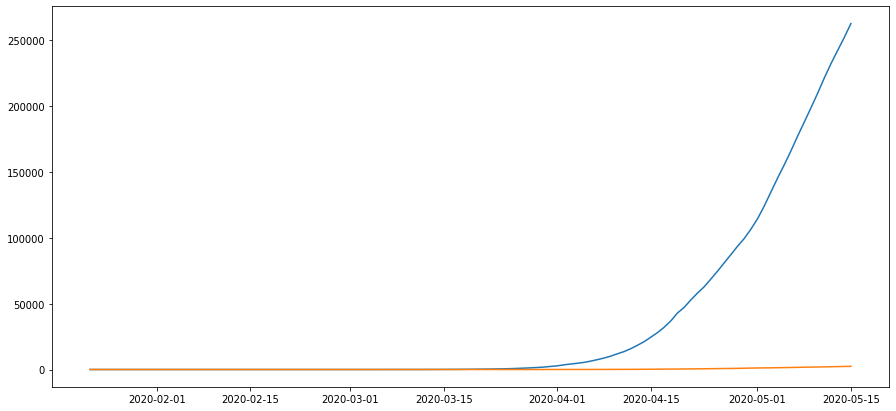

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_train_russia['Date'].values.astype('datetime64[D]'), df_train_russia['ConfirmedCases'].values)
plt.plot(df_train_russia['Date'].values.astype('datetime64[D]'), df_train_russia['Fatalities'].values)

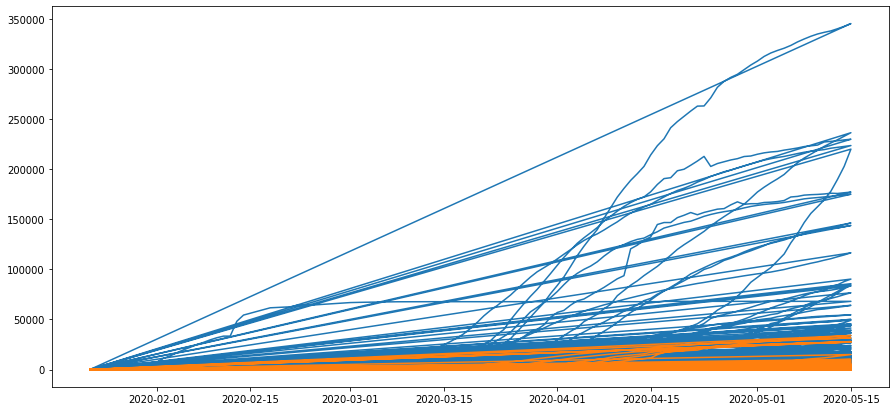

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_test_other_world['Date'].values.astype('datetime64[D]'), df_test_other_world['ConfirmedCases'].values)
plt.plot(df_test_other_world['Date'].values.astype('datetime64[D]'), df_test_other_world['Fatalities'].values)

График имеет такую форму так как внутри данных описано сразу несоклько функций, зависимых от времени, то есть одлеьно для каждой страны.

### Построим модель предсказания для России



####Рассмотрим случаи заболеваемости

In [ ]:
dt_rus_confirmed = df_train_russia.drop("Fatalities", 1)
dt_rus_fatal = df_train_russia.drop("ConfirmedCases", 1)

In [ ]:
dt_rus_confirmed['ConfirmedCases_avg_5'] = dt_rus_confirmed['ConfirmedCases'].rolling(window=5).mean()
dt_rus_confirmed['ConfirmedCases_avg_10'] = dt_rus_confirmed['ConfirmedCases'].rolling(window=10).mean()
dt_rus_confirmed['ConfirmedCases_avg_20'] = dt_rus_confirmed['ConfirmedCases'].rolling(window=20).mean()

In [ ]:
iplot([
    go.Scatter(x=dt_rus_confirmed.tail(10000).Date , y=dt_rus_confirmed.tail(10000).ConfirmedCases, name='fact'),
    go.Scatter(x=dt_rus_confirmed.tail(10000).Date , y=dt_rus_confirmed.tail(10000).ConfirmedCases_avg_5, name='fact_conf_average_5_days'),
    go.Scatter(x=dt_rus_confirmed.tail(10000).Date , y=dt_rus_confirmed.tail(10000).ConfirmedCases_avg_10, name='fact_conf_average_10_days'),
    go.Scatter(x=dt_rus_confirmed.tail(10000).Date , y=dt_rus_confirmed.tail(10000).ConfirmedCases_avg_20, name='fact_conf_average_20_days') 
]);

plt.show()

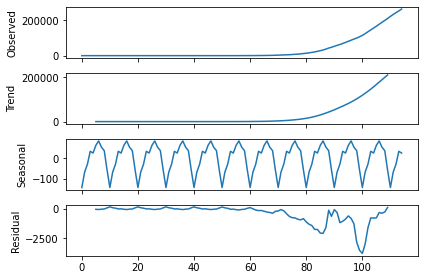

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(dt_rus_confirmed['ConfirmedCases'],freq = 10)

decomp.plot()
plt.show()

In [ ]:
dt_for_model = dt_rus_confirmed.rename(columns = {'Date':'ds', 'ConfirmedCases':'y'})
model = Prophet()
model.fit(dt_for_model)
future = model.make_future_dataframe(periods=20 , freq = 'd')
forecast = model.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


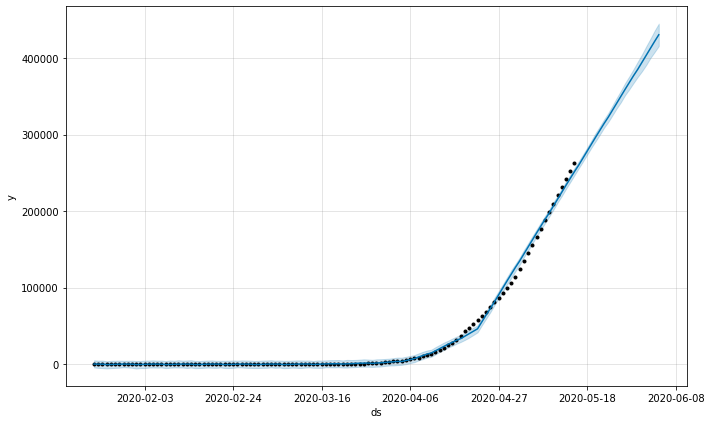

In [ ]:
model.plot(forecast);

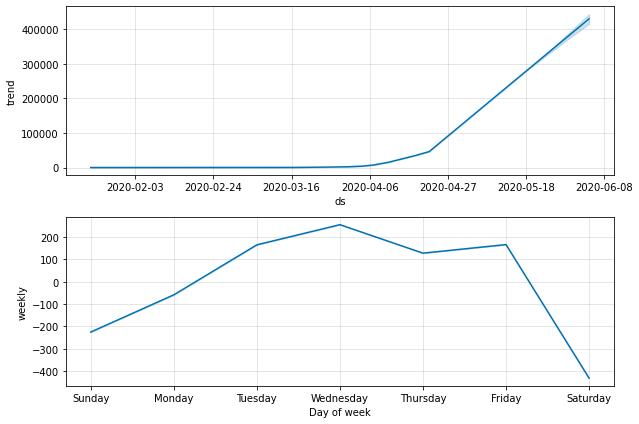

In [ ]:
model.plot_components(forecast);

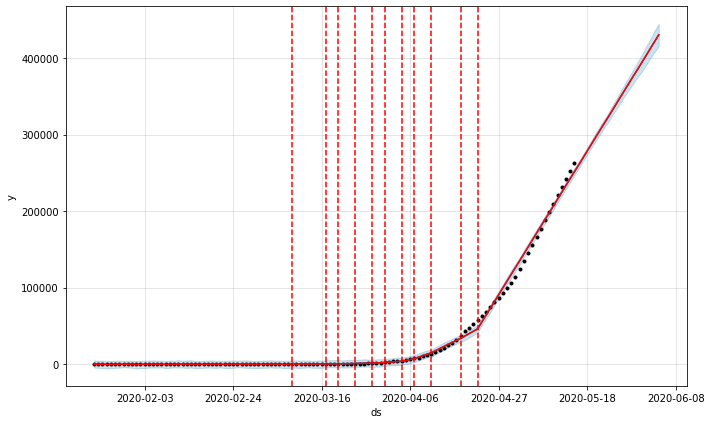

In [ ]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


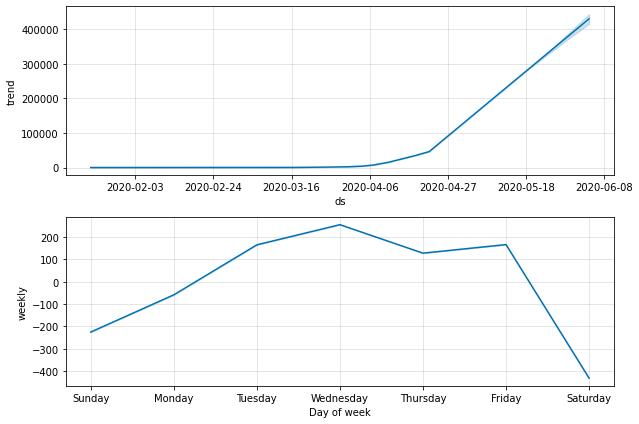

In [ ]:
model.plot_components(forecast);predictions_period = 10


train_df = dt_for_model[:-predictions_period] 
#train_df = df 

model = Prophet(
#            weekly_seasonality = False, 
  #          yearly_seasonality = True, 
   #         daily_seasonality = False
      #    seasonality_prior_scale = 10
            #seasonality_mode = 'additive',
       # seasonality_mode = 'multiplicative',
#            interval_width = 0.95,
     #      n_changepoints = 30,
      #     changepoint_prior_scale = 0.6
       #   changepoint_range =  0.9

  #          n_changepoints = 25
#             changepoints = changepoints,
#            holidays = holidays_df1,
#         holidays_prior_scale = 0.00001,
#
#             growth = 'linear'
            )

model.fit(train_df)

future = model.make_future_dataframe(periods=predictions_period, freq='d')
forecast = model.predict(future)

In [ ]:
new_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper','trend']].join(dt_for_model.set_index('ds'))

new_df['e'] = new_df['y'] - new_df['yhat']
new_df['p'] = 100 * new_df['e']/new_df['y']


abs_p = abs(new_df[-predictions_period:]['p'])
abs_e = abs(new_df[-predictions_period:]['e'])

print ('MAPE - ошибка в процентах', str(round(np.mean(abs(new_df[-predictions_period:]['p'])),2))+'%')

print ('MAE - абсолютная ошибка', round(np.mean(abs(new_df[-predictions_period:]['e'])),2))
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

iplot([
    go.Scatter(x=new_df.tail(10000).index , y=new_df.tail(10000).y, name='fact'),
    go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat, name='forecast'),
    go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat_lower, fill='tonexty', mode='none', name='lower_bound'),
     go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat_upper, fill='tonexty', mode='none', name='upper_bound')
])
print ('MAPE - ошибка в процентах', str(round(np.mean(abs(new_df[-predictions_period:]['p'])),2))+'%')

print ('MAE - абсолютная ошибка', round(np.mean(abs(new_df[-predictions_period:]['e'])),0))

MAPE - ошибка в процентах 20.0%
MAE - абсолютная ошибка 44181.75


MAPE - ошибка в процентах 20.0%
MAE - абсолютная ошибка 44182.0


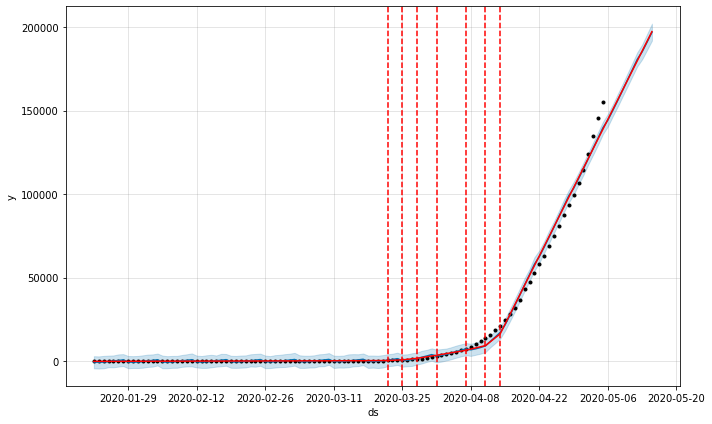

In [ ]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

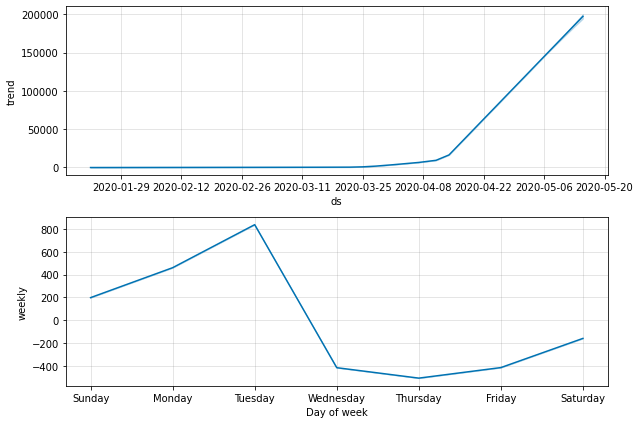

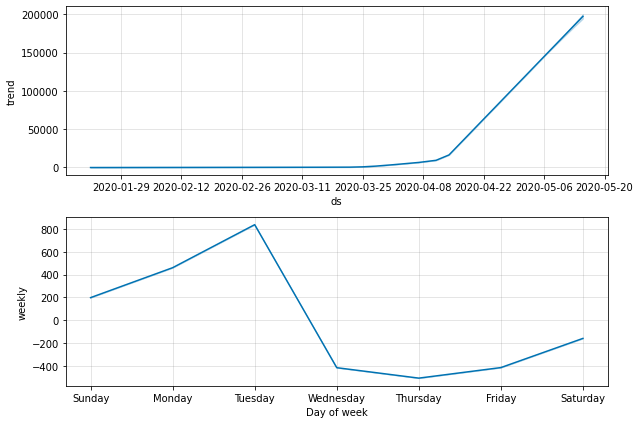

In [ ]:
model.plot_components(forecast)

#### Теперь рассмотрим для случаев смерти

In [ ]:
dt_rus_fatal['Fatalities_avg_5'] = dt_rus_fatal['Fatalities'].rolling(window=5).mean()
dt_rus_fatal['Fatalities_avg_10'] = dt_rus_fatal['Fatalities'].rolling(window=10).mean()
dt_rus_fatal['Fatalities_avg_20'] = dt_rus_fatal['Fatalities'].rolling(window=20).mean()

In [ ]:
iplot([
    go.Scatter(x=dt_rus_fatal.tail(10000).Date , y=dt_rus_fatal.tail(10000).Fatalities, name='fact'),
    go.Scatter(x=dt_rus_fatal.tail(10000).Date , y=dt_rus_fatal.tail(10000).Fatalities_avg_5, name='fact_fatal_average_5_days'),
    go.Scatter(x=dt_rus_fatal.tail(10000).Date , y=dt_rus_fatal.tail(10000).Fatalities_avg_10, name='fact_fatal_average_10_days'),
    go.Scatter(x=dt_rus_fatal.tail(10000).Date , y=dt_rus_fatal.tail(10000).Fatalities_avg_20, name='fact_fatal_average_20_days') 
]);

plt.show()

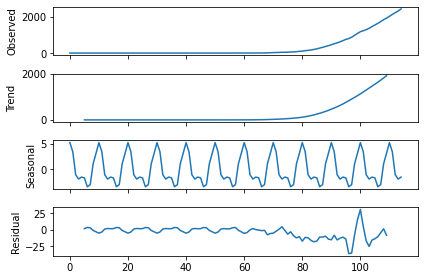

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(dt_rus_fatal['Fatalities'],freq = 10)

decomp.plot()
plt.show()

Видно, что на данных высокая сезонность, т.е. наши значения далеко не случайны. Шума не очень много, есть только один участок, где наблюдается колебание: можем рассмотреть его ближе, т.к. в целом все остальные данные по "российскому" датасету выглядят гладко.

In [ ]:
dt_rus_fatal.Date = pd.to_datetime(dt_rus_fatal.Date)

In [ ]:
d_rus_fatal_residual = dt_rus_fatal[dt_rus_fatal.Date >= '22.04.2020']
d_rus_fatal_residual = d_rus_fatal_residual[d_rus_fatal_residual.Date <= '05.05.2020']

In [ ]:
iplot([
    go.Scatter(x=d_rus_fatal_residual.tail(10000).Date , y=d_rus_fatal_residual.tail(10000).Fatalities, name='fact')
]);

plt.show()

Кажется, что внутри самого интервала времени, в котором, нам показалось, есть зашумление, в конце концов все нормально.

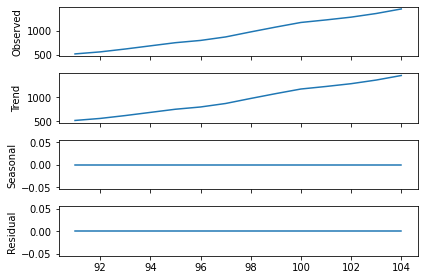

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(d_rus_fatal_residual['Fatalities'],freq = 1)

decomp.plot()
plt.show()

In [ ]:
dt_rus_fatal = dt_rus_fatal.drop('Fatalities_avg_5',1).drop('Fatalities_avg_10',1).drop('Fatalities_avg_20',1)
dt_for_model = dt_rus_fatal.rename(columns = {'Date':'ds', 'Fatalities':'y'})

In [ ]:
model = Prophet()
model.fit(dt_for_model)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=20 , freq = 'd')
forecast = model.predict(future)

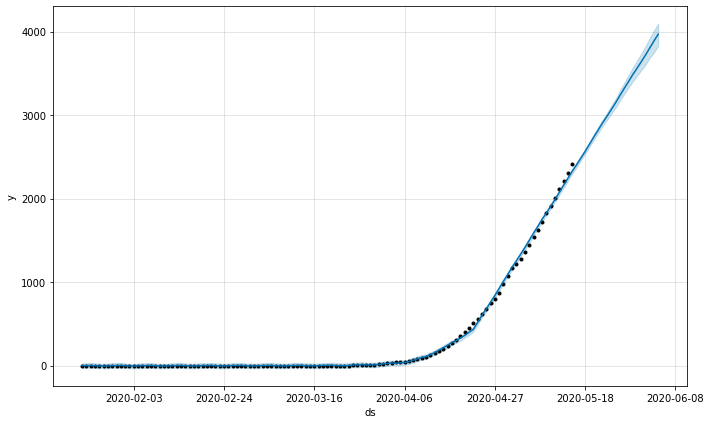

In [ ]:
model.plot(forecast);

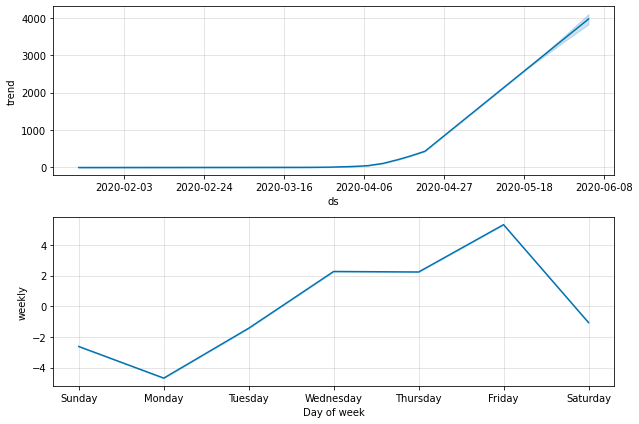

In [ ]:
model.plot_components(forecast);

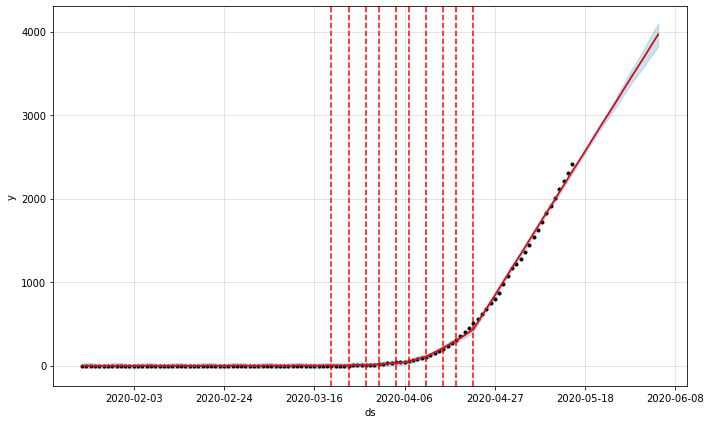

In [ ]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


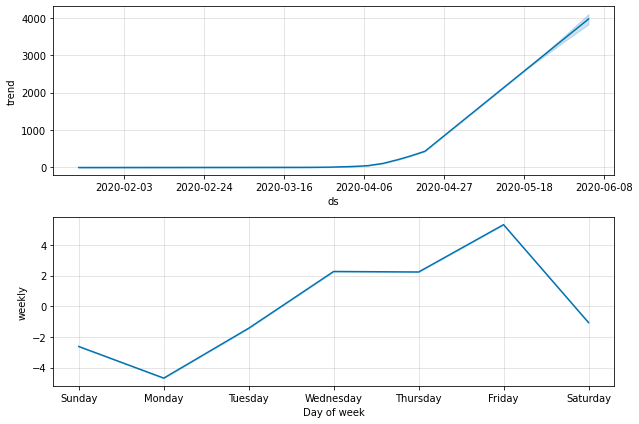

In [ ]:
model.plot_components(forecast);predictions_period = 10


train_df = dt_for_model[:-predictions_period] 
#train_df = df 

model = Prophet(
#            weekly_seasonality = False, 
  #          yearly_seasonality = True, 
   #         daily_seasonality = False
      #    seasonality_prior_scale = 10
            #seasonality_mode = 'additive',
       # seasonality_mode = 'multiplicative',
#            interval_width = 0.95,
     #      n_changepoints = 30,
      #     changepoint_prior_scale = 0.6
       #   changepoint_range =  0.9

  #          n_changepoints = 25
#             changepoints = changepoints,
#            holidays = holidays_df1,
#         holidays_prior_scale = 0.00001,
#
#             growth = 'linear'
            )

model.fit(train_df)

future = model.make_future_dataframe(periods=predictions_period, freq='d')
forecast = model.predict(future)

In [ ]:
new_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper','trend']].join(dt_for_model.set_index('ds'))

new_df['e'] = new_df['y'] - new_df['yhat']
new_df['p'] = 100 * new_df['e']/new_df['y']


abs_p = abs(new_df[-predictions_period:]['p'])
abs_e = abs(new_df[-predictions_period:]['e'])

print ('MAPE - ошибка в процентах', str(round(np.mean(abs(new_df[-predictions_period:]['p'])),2))+'%')

print ('MAE - абсолютная ошибка', round(np.mean(abs(new_df[-predictions_period:]['e'])),2))

MAPE - ошибка в процентах 15.79%
MAE - абсолютная ошибка 320.78


In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

iplot([
    go.Scatter(x=new_df.tail(10000).index , y=new_df.tail(10000).y, name='fact'),
    go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat, name='forecast'),
    go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat_lower, fill='tonexty', mode='none', name='lower_bound'),
     go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat_upper, fill='tonexty', mode='none', name='upper_bound')
])

print ('MAPE - ошибка в процентах', str(round(np.mean(abs(new_df[-predictions_period:]['p'])),2))+'%')

print ('MAE - абсолютная ошибка', round(np.mean(abs(new_df[-predictions_period:]['e'])),0))

MAPE - ошибка в процентах 15.79%
MAE - абсолютная ошибка 321.0


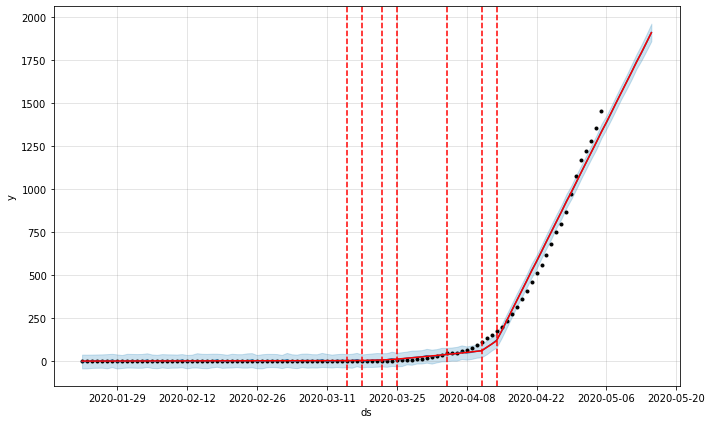

In [ ]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

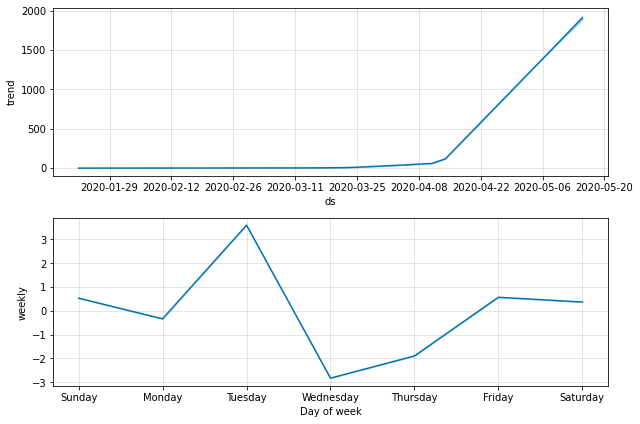

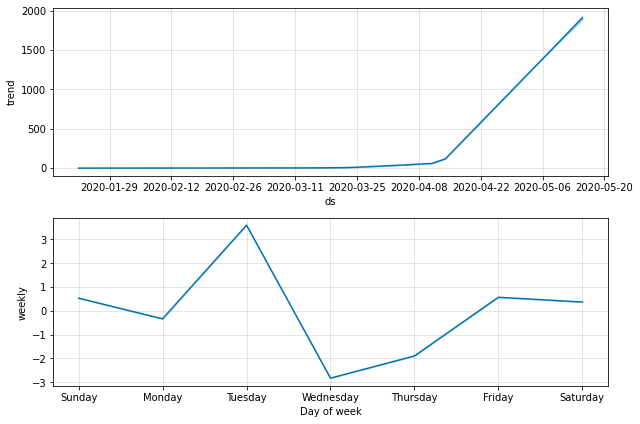

In [ ]:
model.plot_components(forecast)

###Рассмотрим те же самые характеристики, но для мира

Поищем зависимости среди выборок в зависимости от стран, посмотри какие из них можно объединить

Рассмотрим для мира только случаи заболеваемости

In [ ]:
dt_confirmed = df_train.drop("Fatalities",1)

In [ ]:
dt_confirmed = dt_confirmed.drop("Province_State",1).drop("Country_Region",1)

In [ ]:
dt_confirmed['ConfirmedCases_avg_5'] = dt_confirmed['ConfirmedCases'].rolling(window=5).mean()
dt_confirmed['ConfirmedCases_avg_10'] = dt_confirmed['ConfirmedCases'].rolling(window=10).mean()
dt_confirmed['ConfirmedCases_avg_20'] = dt_confirmed['ConfirmedCases'].rolling(window=20).mean()

In [ ]:
import sqlite3
import io
con = sqlite3.connect(':memory:')
sql = '''
SELECT *
FROM dt_confirmed
GROUP BY Date
'''

dt_confirmed = select(sql, [dt_confirmed])

In [ ]:
dt_confirmed = dt_confirmed.drop("Id",1)

In [ ]:
iplot([
    go.Scatter(x=dt_confirmed.tail(10000).Date , y=dt_confirmed.tail(10000).ConfirmedCases, name='fact'),
    ]);

plt.show()

In [ ]:
iplot([
    go.Scatter(x=dt_confirmed.tail(10000).Date , y=dt_confirmed.tail(10000).ConfirmedCases, name='fact'),
    go.Scatter(x=dt_confirmed.tail(10000).Date , y=dt_confirmed.tail(10000).ConfirmedCases_avg_5, name='fact_conf_average_5_days'),
    go.Scatter(x=dt_confirmed.tail(10000).Date , y=dt_confirmed.tail(10000).ConfirmedCases_avg_10, name='fact_conf_average_10_days'),
    go.Scatter(x=dt_confirmed.tail(10000).Date , y=dt_confirmed.tail(10000).ConfirmedCases_avg_20, name='fact_conf_average_20_days') 
]);

plt.show()

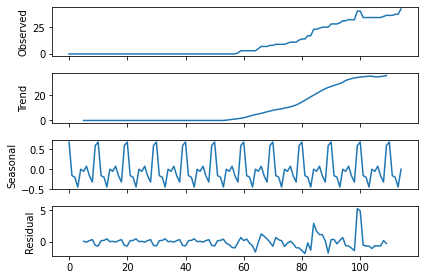

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(dt_confirmed['ConfirmedCases'],freq = 10)

decomp.plot()
plt.show()

In [ ]:
dt_for_model = dt_confirmed.rename(columns = {'Date':'ds', 'ConfirmedCases':'y'})
model = Prophet()
model.fit(dt_for_model)
future = model.make_future_dataframe(periods=20 , freq = 'd')
forecast = model.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


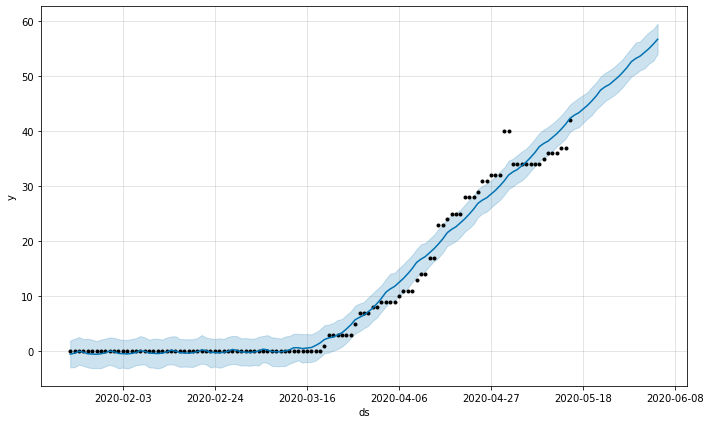

In [ ]:
model.plot(forecast);

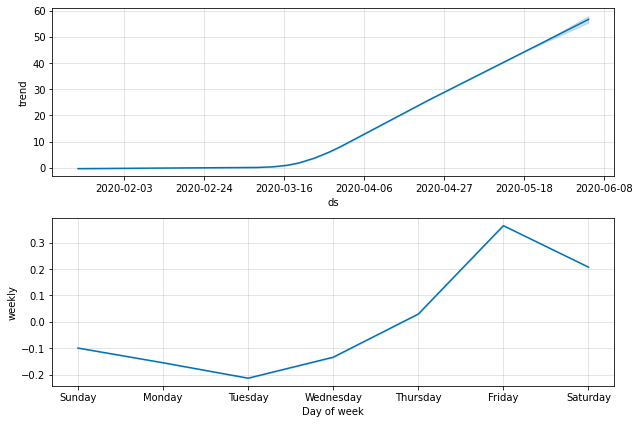

In [ ]:
model.plot_components(forecast);

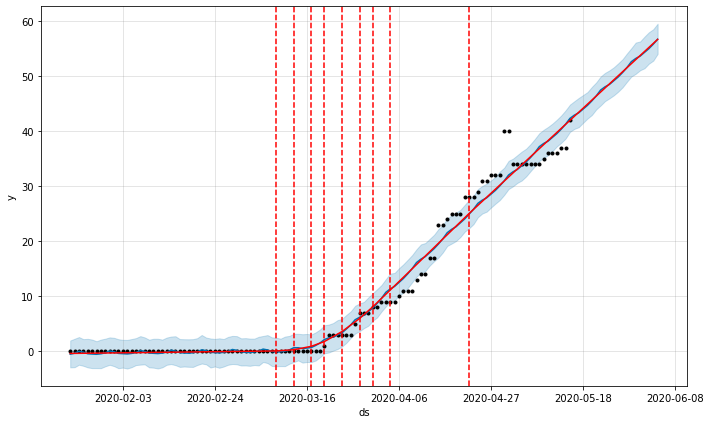

In [ ]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


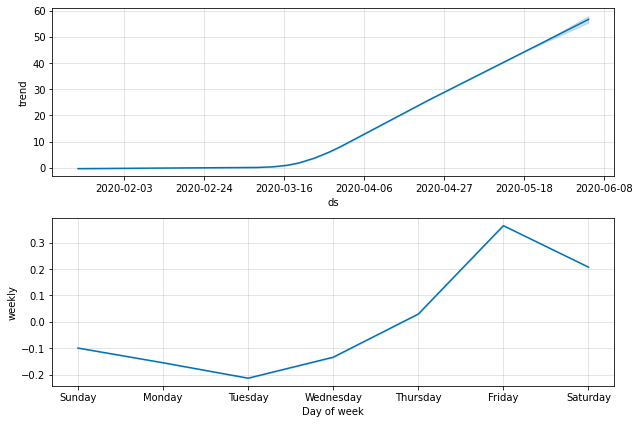

In [ ]:
model.plot_components(forecast);predictions_period = 10


train_df = dt_for_model[:-predictions_period] 
#train_df = df 

model = Prophet(
#            weekly_seasonality = False, 
  #          yearly_seasonality = True, 
   #         daily_seasonality = False
      #    seasonality_prior_scale = 10
            #seasonality_mode = 'additive',
       # seasonality_mode = 'multiplicative',
#            interval_width = 0.95,
     #      n_changepoints = 30,
      #     changepoint_prior_scale = 0.6
       #   changepoint_range =  0.9

  #          n_changepoints = 25
#             changepoints = changepoints,
#            holidays = holidays_df1,
#         holidays_prior_scale = 0.00001,
#
#             growth = 'linear'
            )

model.fit(train_df)

future = model.make_future_dataframe(periods=predictions_period, freq='d')
forecast = model.predict(future)

In [ ]:
new_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper','trend']].join(dt_for_model.set_index('ds'))

new_df['e'] = new_df['y'] - new_df['yhat']
new_df['p'] = 100 * new_df['e']/new_df['y']


abs_p = abs(new_df[-predictions_period:]['p'])
abs_e = abs(new_df[-predictions_period:]['e'])

print ('MAPE - ошибка в процентах', str(round(np.mean(abs(new_df[-predictions_period:]['p'])),2))+'%')

print ('MAE - абсолютная ошибка', round(np.mean(abs(new_df[-predictions_period:]['e'])),2))
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

iplot([
    go.Scatter(x=new_df.tail(10000).index , y=new_df.tail(10000).y, name='fact'),
    go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat, name='forecast'),
    go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat_lower, fill='tonexty', mode='none', name='lower_bound'),
     go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat_upper, fill='tonexty', mode='none', name='upper_bound')
])
print ('MAPE - ошибка в процентах', str(round(np.mean(abs(new_df[-predictions_period:]['p'])),2))+'%')

print ('MAE - абсолютная ошибка', round(np.mean(abs(new_df[-predictions_period:]['e'])),0))

MAPE - ошибка в процентах 21.24%
MAE - абсолютная ошибка 7.65


MAPE - ошибка в процентах 21.24%
MAE - абсолютная ошибка 8.0


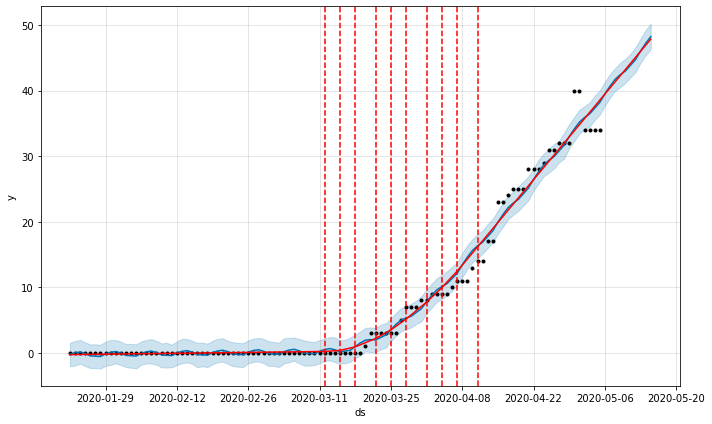

In [ ]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

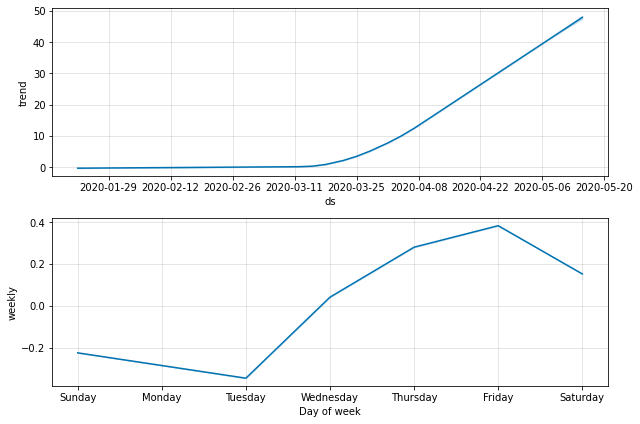

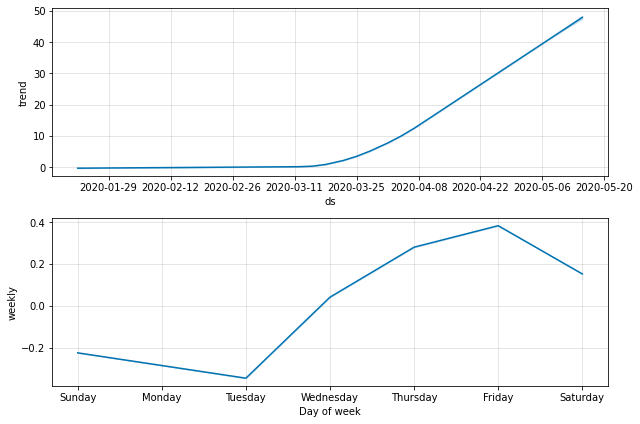

In [ ]:
model.plot_components(forecast)

Рассмотрим случаи смерти


In [ ]:
dt_fatalities = df_train.drop("ConfirmedCases",1)

In [ ]:
dt_fatalities = dt_fatalities.drop("Province_State",1).drop("Country_Region",1)

In [ ]:
dt_fatalities['Fatalities_avg_5'] = dt_fatalities['Fatalities'].rolling(window=5).mean()
dt_fatalities['Fatalities_avg_10'] = dt_fatalities['Fatalities'].rolling(window=10).mean()
dt_fatalities['Fatalities_avg_20'] = dt_fatalities['Fatalities'].rolling(window=20).mean()

In [ ]:
import sqlite3
import io
con = sqlite3.connect(':memory:')
sql = '''
SELECT *
FROM dt_fatalities
GROUP BY Date
'''

dt_fatalities = select(sql, [dt_fatalities])

In [ ]:
iplot([
    go.Scatter(x=dt_fatalities.tail(10000).Date , y=dt_fatalities.tail(10000).Fatalities, name='fact'),
    go.Scatter(x=dt_fatalities.tail(10000).Date , y=dt_fatalities.tail(10000).Fatalities_avg_5, name='Fatalities_avg_5'),
    go.Scatter(x=dt_fatalities.tail(10000).Date , y=dt_fatalities.tail(10000).Fatalities_avg_10, name='Fatalities_avg_10'),
    go.Scatter(x=dt_fatalities.tail(10000).Date , y=dt_fatalities.tail(10000).Fatalities_avg_20, name='Fatalities_avg_20') 
]);

plt.show()

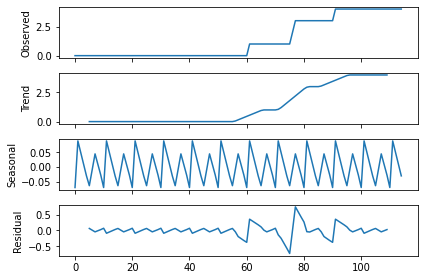

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(dt_fatalities['Fatalities'],freq = 10)

decomp.plot()
plt.show()

In [ ]:
dt_fatalities.Date = pd.to_datetime(dt_fatalities.Date)

In [ ]:
d_fatal_residual = dt_fatalities[dt_fatalities.Date >= '22.04.2020']
d_fatal_residual = d_fatal_residual[d_fatal_residual.Date <= '05.05.2020']

In [ ]:
iplot([
    go.Scatter(x=d_fatal_residual.tail(10000).Date , y=d_fatal_residual.tail(10000).Fatalities, name='fact')
]);

plt.show()

In [ ]:
dt_fatal = dt_fatalities.drop('Fatalities_avg_5',1).drop('Fatalities_avg_10',1).drop('Fatalities_avg_20',1)
dt_for_model = dt_fatalities.rename(columns = {'Date':'ds', 'Fatalities':'y'})

In [ ]:
model = Prophet()
model.fit(dt_for_model)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=20 , freq = 'd')
forecast = model.predict(future)

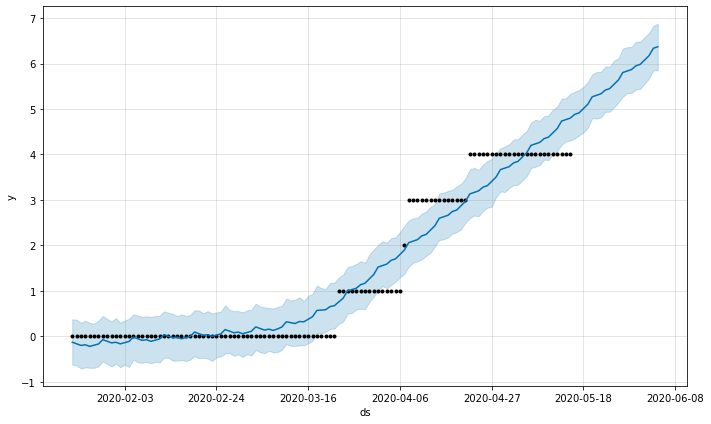

In [ ]:
model.plot(forecast);

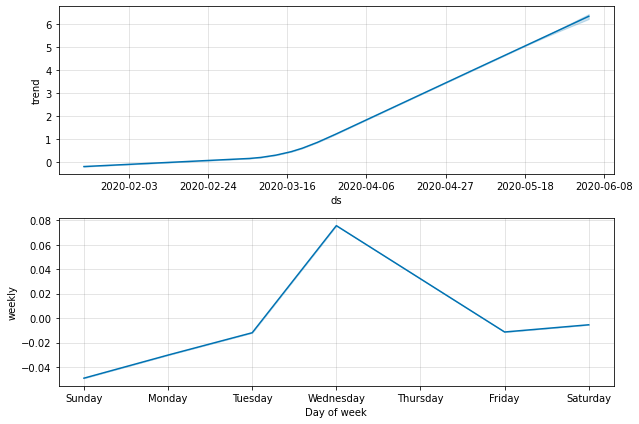

In [ ]:
model.plot_components(forecast);

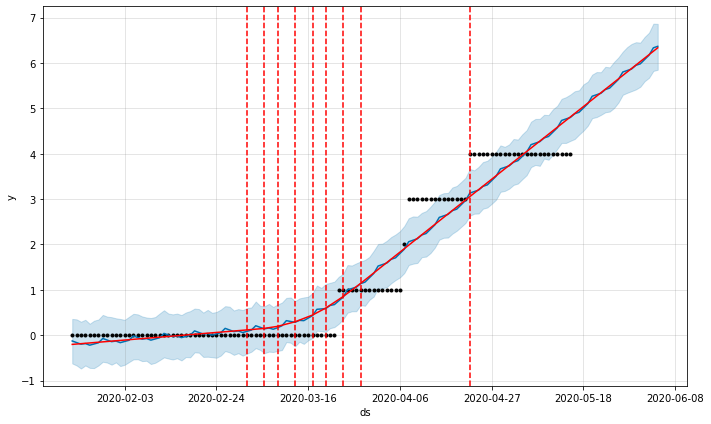

In [ ]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


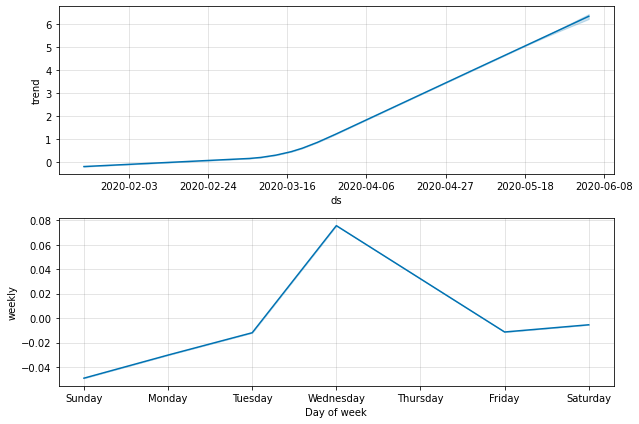

In [ ]:
model.plot_components(forecast);predictions_period = 10


train_df = dt_for_model[:-predictions_period] 
#train_df = df 

model = Prophet(
#            weekly_seasonality = False, 
  #          yearly_seasonality = True, 
   #         daily_seasonality = False
      #    seasonality_prior_scale = 10
            #seasonality_mode = 'additive',
       # seasonality_mode = 'multiplicative',
#            interval_width = 0.95,
     #      n_changepoints = 30,
      #     changepoint_prior_scale = 0.6
       #   changepoint_range =  0.9

  #          n_changepoints = 25
#             changepoints = changepoints,
#            holidays = holidays_df1,
#         holidays_prior_scale = 0.00001,
#
#             growth = 'linear'
            )

model.fit(train_df)

future = model.make_future_dataframe(periods=predictions_period, freq='d')
forecast = model.predict(future)

In [ ]:
new_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper','trend']].join(dt_for_model.set_index('ds'))

new_df['e'] = new_df['y'] - new_df['yhat']
new_df['p'] = 100 * new_df['e']/new_df['y']


abs_p = abs(new_df[-predictions_period:]['p'])
abs_e = abs(new_df[-predictions_period:]['e'])

print ('MAPE - ошибка в процентах', str(round(np.mean(abs(new_df[-predictions_period:]['p'])),2))+'%')

print ('MAE - абсолютная ошибка', round(np.mean(abs(new_df[-predictions_period:]['e'])),2))

MAPE - ошибка в процентах 27.5%
MAE - абсолютная ошибка 1.1


In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

iplot([
    go.Scatter(x=new_df.tail(10000).index , y=new_df.tail(10000).y, name='fact'),
    go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat, name='forecast'),
    go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat_lower, fill='tonexty', mode='none', name='lower_bound'),
     go.Scatter(x=new_df.tail(predictions_period).index, y=new_df.tail(predictions_period).yhat_upper, fill='tonexty', mode='none', name='upper_bound')
])

print ('MAPE - ошибка в процентах', str(round(np.mean(abs(new_df[-predictions_period:]['p'])),2))+'%')

print ('MAE - абсолютная ошибка', round(np.mean(abs(new_df[-predictions_period:]['e'])),0))

MAPE - ошибка в процентах 27.5%
MAE - абсолютная ошибка 1.0


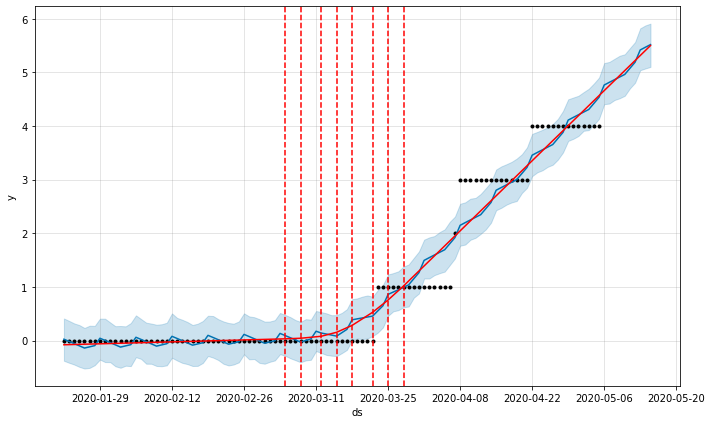

In [ ]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

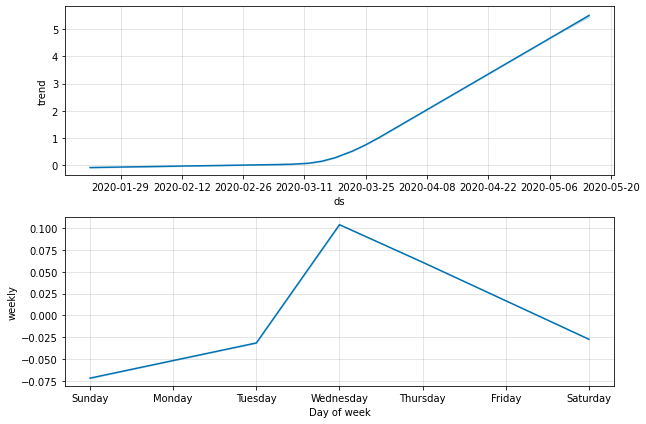

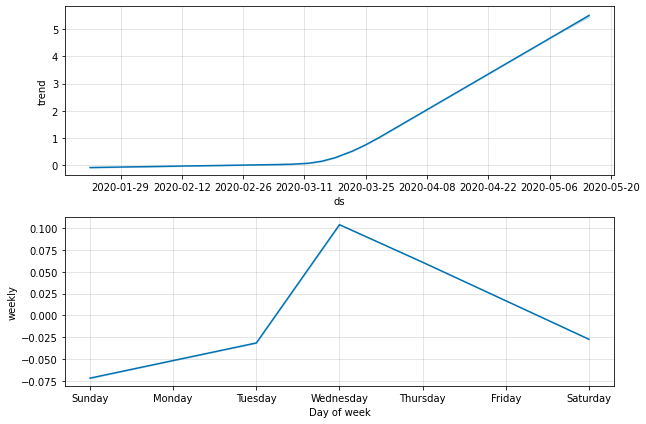

In [ ]:
model.plot_components(forecast)

###Посмотрим на распространенние заболеваемости в принципе в стране

In [ ]:

sql = '''
SELECT *
FROM df_train
WHERE (Date >'2020-01-01' and Date < '2020-01-31')
GROUP BY Country_Region
'''

month_one = select(sql, [df_train])

sql = '''
SELECT *
FROM df_train
WHERE (Date >'2020-01-01' and Date < '2020-02-31')
GROUP BY Country_Region
'''

month_two = select(sql, [df_train])

sql = '''
SELECT *
FROM df_train
WHERE (Date >'2020-01-01' and Date < '2020-03-31')
GROUP BY Country_Region
'''
month_three = select(sql, [df_train])

sql = '''
SELECT *
FROM df_train
WHERE (Date >'2020-01-01' and Date < '2020-04-31')
GROUP BY Country_Region
'''
month_four = select(sql, [df_train])

sql = '''
SELECT *
FROM df_train
WHERE (Date >'2020-01-01' and Date < '2020-05-31')
GROUP BY Country_Region
'''

month_five = select(sql, [df_train])

In [ ]:
month_one.head()

index     pop_est continent  ... Fatalities   latitude   longitude
0    109  1379302771      Asia  ...        0.0  35.861660  104.195397
1     73    68414135      Asia  ...        0.0  15.870032  100.992541
2    123   126451398      Asia  ...        0.0  36.204824  138.252924
3    117    31381992      Asia  ...        0.0   4.210484  101.975766
4     67     6072475      Asia  ...        0.0  23.424076   53.847818

[5 rows x 15 columns]

In [ ]:
month_two.head()

index     pop_est continent  ... Fatalities   latitude   longitude
0    109  1379302771      Asia  ...        1.0  35.861660  104.195397
1    110    62137802    Europe  ...       29.0  41.871940   12.567380
2    123   126451398      Asia  ...        5.0  36.204824  138.252924
3     93    80594017    Europe  ...        0.0  51.165691   10.451526
4     73    68414135      Asia  ...        0.0  15.870032  100.992541

[5 rows x 15 columns]

In [ ]:
month_three.head()

index   pop_est continent  ... Fatalities   latitude  longitude
0    110  62137802    Europe  ...    11620.0  41.871940  12.567380
1    104  48958159    Europe  ...     7716.0  40.463667  -3.749220
2     93  80594017    Europe  ...      645.0  51.165691  10.451526
3    112  64769452    Europe  ...     2043.0  55.378051  -3.435973
4     99   8236303    Europe  ...      359.0  46.818188   8.227512

[5 rows x 15 columns]

In [ ]:
month_four.head()

index   pop_est continent  ... Fatalities   latitude  longitude
0    110  62137802    Europe  ...    39587.0  41.871940  12.567380
1    104  48958159    Europe  ...    32259.0  40.463667  -3.749220
2     93  80594017    Europe  ...     7268.0  51.165691  10.451526
3    112  64769452    Europe  ...    28814.0  55.378051  -3.435973
4     96  80845215      Asia  ...     3342.0  38.963745  35.243322

[5 rows x 15 columns]

In [ ]:
month_five.head()

index    pop_est      continent  ... Fatalities   latitude  longitude
0    110   62137802         Europe  ...    71197.0  41.871940  12.567380
1    104   48958159         Europe  ...    59718.0  40.463667  -3.749220
2    112   64769452         Europe  ...    62812.0  55.378051  -3.435973
3     93   80594017         Europe  ...    15165.0  51.165691  10.451526
4     20  207353391  South America  ...    21127.0 -14.235004 -51.925280

[5 rows x 15 columns]

In [ ]:
def alpha3code(column):
  CODE=[]
  for country in column:
    try: 
      code=pycountry.countries.get(name=country).alpha_3
      CODE.append(code)
    except:
      CODE.append('None')
  return CODE

month_one['CODE'] = alpha3code(month_one.Country_Region)
month_two['CODE'] = alpha3code(month_two.Country_Region)
month_three['CODE'] = alpha3code(month_three.Country_Region)
month_four['CODE'] = alpha3code(month_four.Country_Region)
month_five['CODE'] = alpha3code(month_five.Country_Region)

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

month_one=pd.merge(world, month_one, on='CODE')
month_two=pd.merge(world, month_two, on='CODE')
month_three=pd.merge(world, month_three, on='CODE')
month_four=pd.merge(world, month_four, on='CODE')
month_five=pd.merge(world, month_five, on='CODE')

location = pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
month_one=month_one.merge(location, on='name').sort_values(by='ConfirmedCases', ascending=False).reset_index()
month_two=month_two.merge(location, on='name').sort_values(by='ConfirmedCases', ascending=False).reset_index()
month_three=month_three.merge(location, on='name').sort_values(by='ConfirmedCases', ascending=False).reset_index()
month_four=month_four.merge(location, on='name').sort_values(by='ConfirmedCases', ascending=False).reset_index()
month_five=month_five.merge(location, on='name').sort_values(by='ConfirmedCases', ascending=False).reset_index()

In [ ]:
month_one.head()

index     pop_est continent  ... Fatalities   latitude   longitude
0    109  1379302771      Asia  ...        0.0  35.861660  104.195397
1     73    68414135      Asia  ...        0.0  15.870032  100.992541
2    123   126451398      Asia  ...        0.0  36.204824  138.252924
3    117    31381992      Asia  ...        0.0   4.210484  101.975766
4     67     6072475      Asia  ...        0.0  23.424076   53.847818

[5 rows x 15 columns]

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning:


/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning:




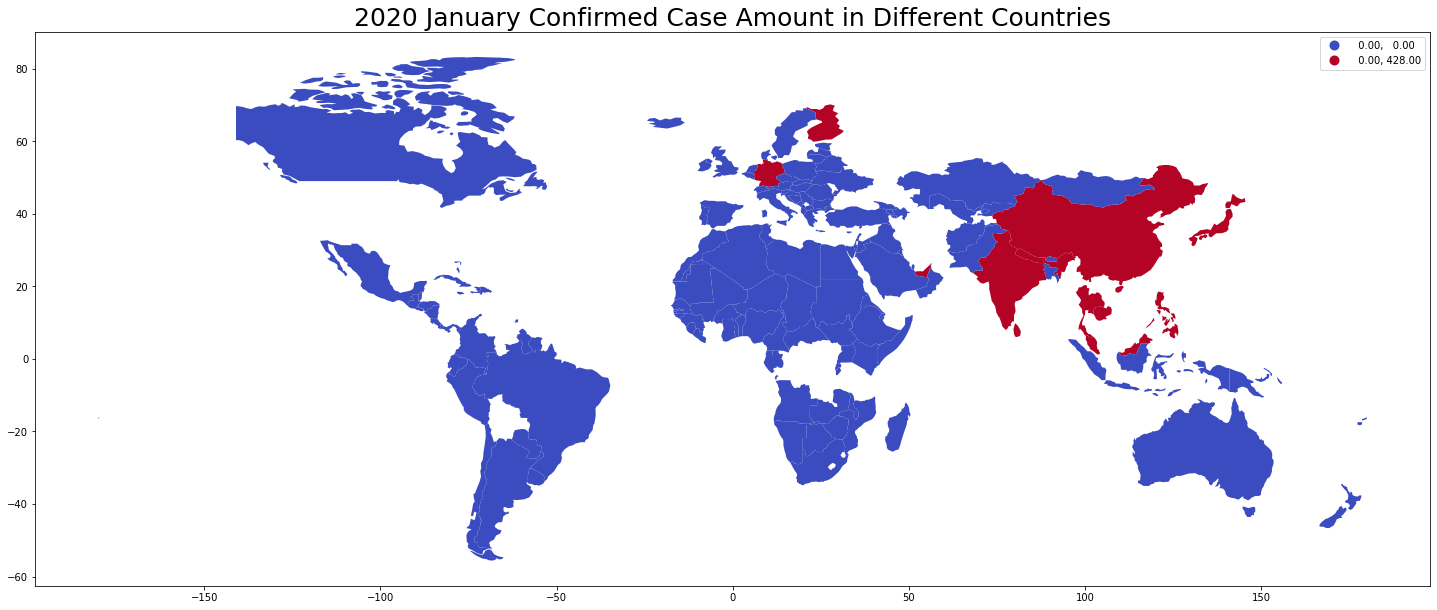

In [ ]:
month_one.plot(column='ConfirmedCases', scheme="quantiles", figsize=(25,20), legend=True, cmap='coolwarm')
plt.title('2020 January Confirmed Case Amount in Different Countries', fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning:


/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning:




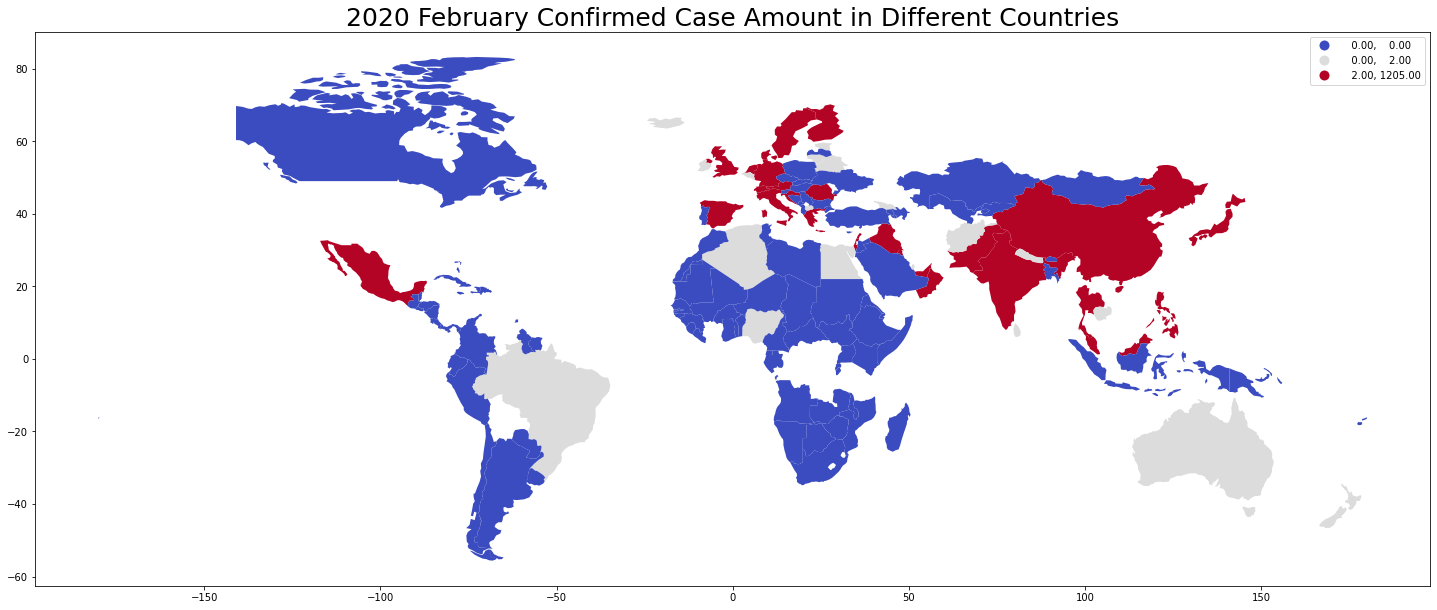

In [ ]:
month_two.plot(column='ConfirmedCases', scheme="quantiles", figsize=(25,20), legend=True, cmap='coolwarm')
plt.title('2020 February Confirmed Case Amount in Different Countries', fontsize=25)
plt.show()

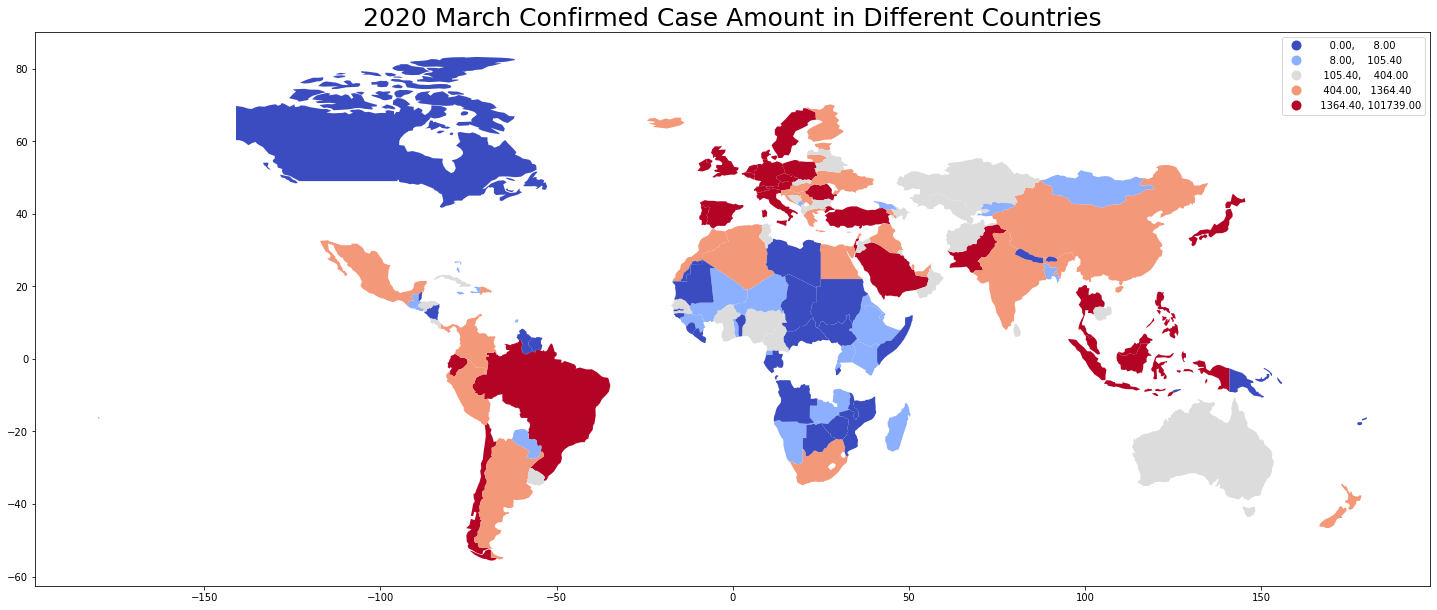

In [ ]:
month_three.plot(column='ConfirmedCases', scheme="quantiles", figsize=(25,20), legend=True, cmap='coolwarm')
plt.title('2020 March Confirmed Case Amount in Different Countries', fontsize=25)
plt.show()

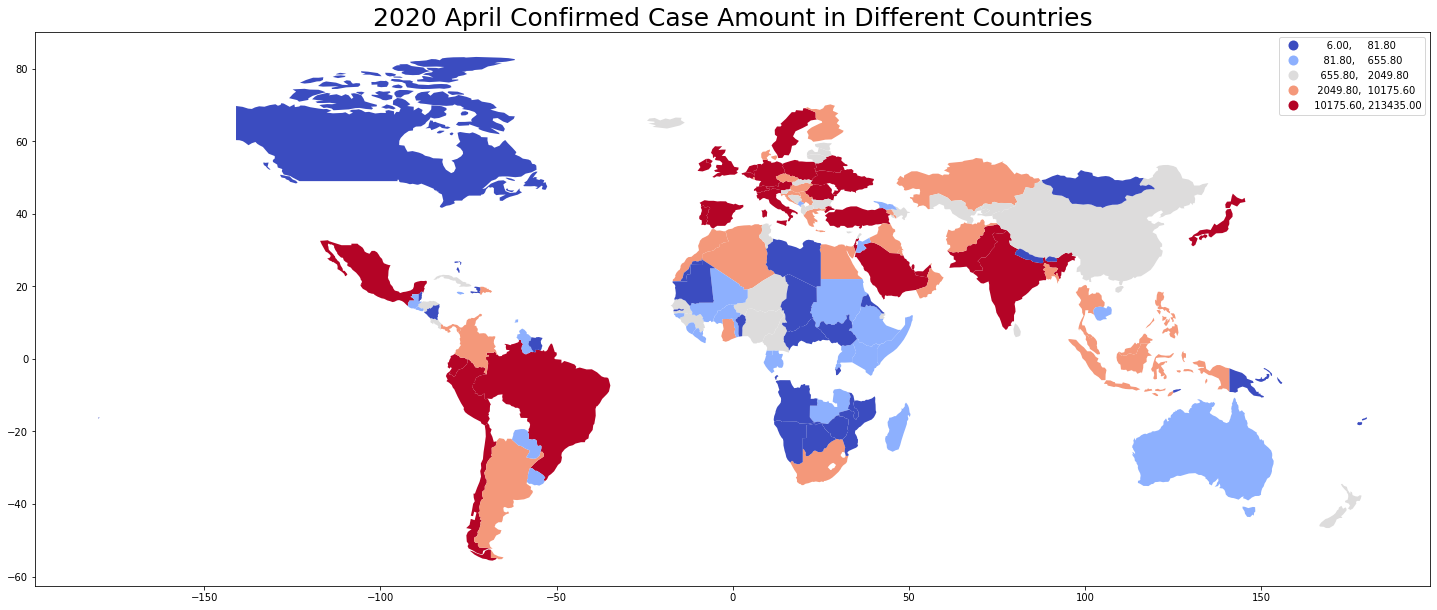

In [ ]:
month_four.plot(column='ConfirmedCases', scheme="quantiles", figsize=(25,20), legend=True, cmap='coolwarm')
plt.title('2020 April Confirmed Case Amount in Different Countries', fontsize=25)
plt.show()

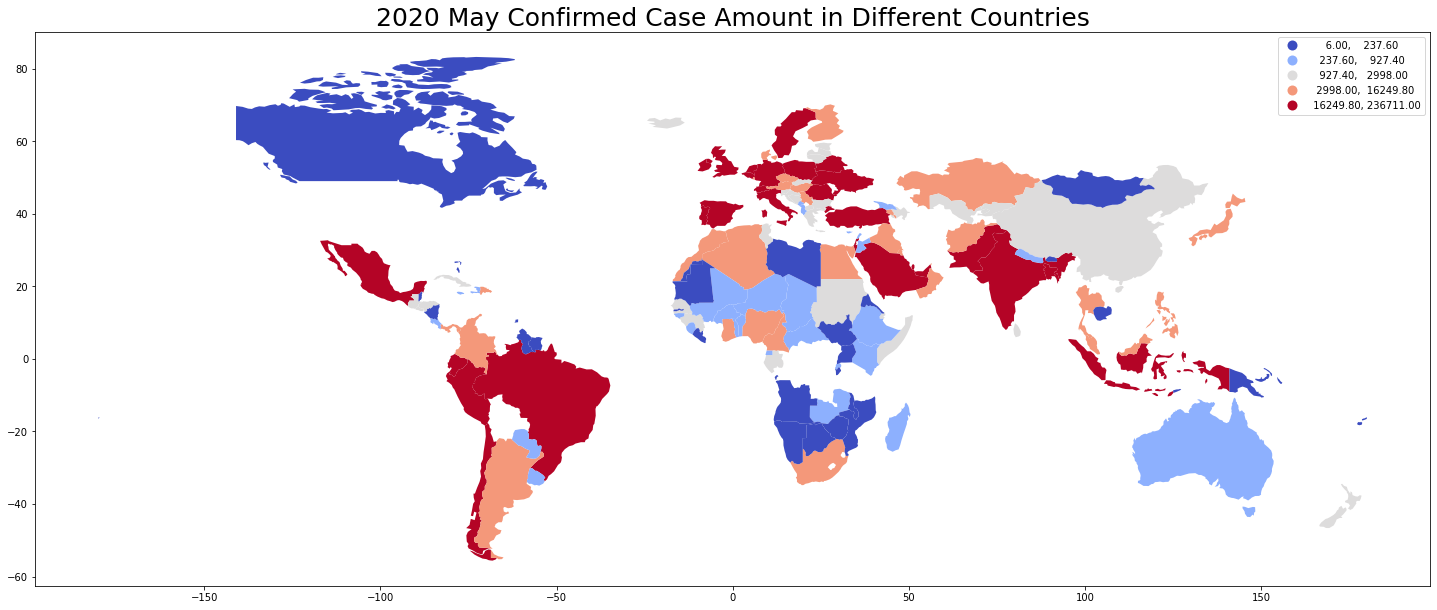

In [ ]:
month_five.plot(column='ConfirmedCases', scheme="quantiles", figsize=(25,20), legend=True, cmap='coolwarm')
plt.title('2020 May Confirmed Case Amount in Different Countries', fontsize=25)
plt.show()

#1 Step. Interpolation

Жесткий локдаун в Китае



R^2 for World (ConfirmedCases): 0.959291692

RMSE (ml_metrics.metrics): 2.802965263
RMSE (scikit-learn): 2.802965263
MAE (ml_metrics.metrics): 2.220513219
MAE (scikit-learn): 2.220513219


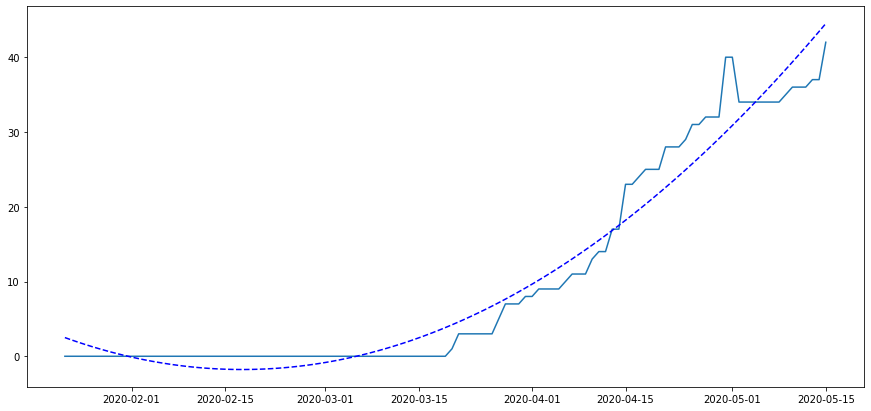

In [ ]:
#1 Just Aproximation

import numpy as np
from datetime import datetime

sql = '''
SELECT *
FROM df_train
GROUP BY Date
'''
df_train_new = select(sql, [df_train])
dta = df_train_new

plt.figure(figsize=(15,7))
plt.plot(dta['Date'].values.astype('datetime64[D]'), dta['ConfirmedCases'].values)

n_data = len(dta['Date'].values.astype('datetime64[D]'))

# y = x^3*a3 + x^2*a2 + x*a1 + a0
model = np.polyfit(x = np.arange(n_data), y = np.array(dta['ConfirmedCases']), deg = 2)
polynom = np.poly1d(model)

plt.plot(dta['Date'].values.astype('datetime64[D]'), polynom( np.arange(n_data) ), 'b--')

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import ml_metrics as metrics

print ('\n\nR^2 for World (ConfirmedCases): %1.9f' % r2_score(dta['ConfirmedCases'], polynom( np.arange(n_data) )))
print ('\nRMSE (ml_metrics.metrics): %.9f' % metrics.rmse(dta['ConfirmedCases'], polynom( np.arange(n_data) )))
print ('RMSE (scikit-learn): %.9f' % np.sqrt(mean_squared_error(dta['ConfirmedCases'], polynom( np.arange(n_data) ))))
print ('MAE (ml_metrics.metrics): %.9f' % metrics.mae(dta['ConfirmedCases'], polynom( np.arange(n_data) )))
print ('MAE (scikit-learn): %.9f' % mean_absolute_error(dta['ConfirmedCases'], polynom( np.arange(n_data) )))



R^2: 0.916551387

RMSE (ml_metrics.metrics): 0.481941838
RMSE (scikit-learn): 0.481941838
MAE (ml_metrics.metrics): 0.359980890
MAE (scikit-learn): 0.359980890


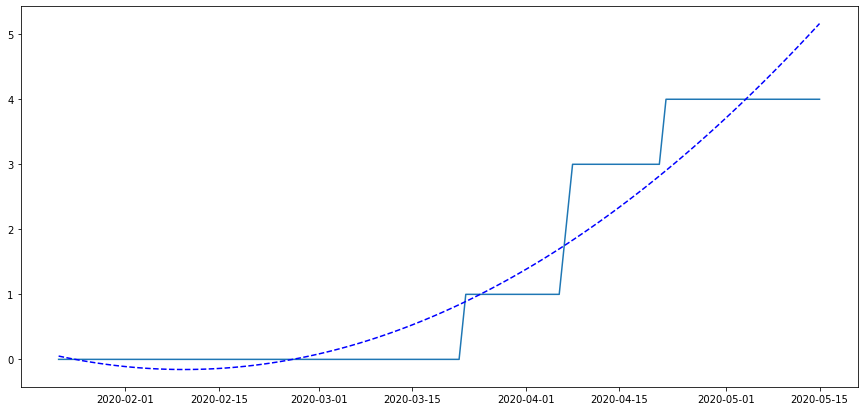

In [ ]:
#1 Just Aproximation

import numpy as np
from datetime import datetime

sql = '''
SELECT *
FROM df_train
GROUP BY Date
'''
df_train_new_2 = select(sql, [df_train])
dta = df_train_new_2


plt.figure(figsize=(15,7))
plt.plot(dta['Date'].values.astype('datetime64[D]'), dta['Fatalities'].values)

n_data = len(dta['Date'].values.astype('datetime64[D]'))

# y = x^3*a3 + x^2*a2 + x*a1 + a0
model = np.polyfit(x = np.arange(n_data), y = np.array(dta['Fatalities']), deg = 2)
polynom = np.poly1d(model)

plt.plot(dta['Date'].values.astype('datetime64[D]'), polynom( np.arange(n_data) ), 'b--')

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import ml_metrics as metrics

print ('\n\nR^2 for World (Fatalities): %1.9f' % r2_score(dta['Fatalities'], polynom( np.arange(n_data) )))
print ('\nRMSE (ml_metrics.metrics): %.9f' % metrics.rmse(dta['Fatalities'], polynom( np.arange(n_data) )))
print ('RMSE (scikit-learn): %.9f' % np.sqrt(mean_squared_error(dta['Fatalities'], polynom( np.arange(n_data) ))))
print ('MAE (ml_metrics.metrics): %.9f' % metrics.mae(dta['Fatalities'], polynom( np.arange(n_data) )))
print ('MAE (scikit-learn): %.9f' % mean_absolute_error(dta['Fatalities'], polynom( np.arange(n_data) )))



R^2 for Russia (ConfirmedCases): 0.882773278

RMSE (ml_metrics.metrics): 22601.613918548
RMSE (scikit-learn): 22601.613918548
MAE (ml_metrics.metrics): 19374.534066660
MAE (scikit-learn): 19374.534066660


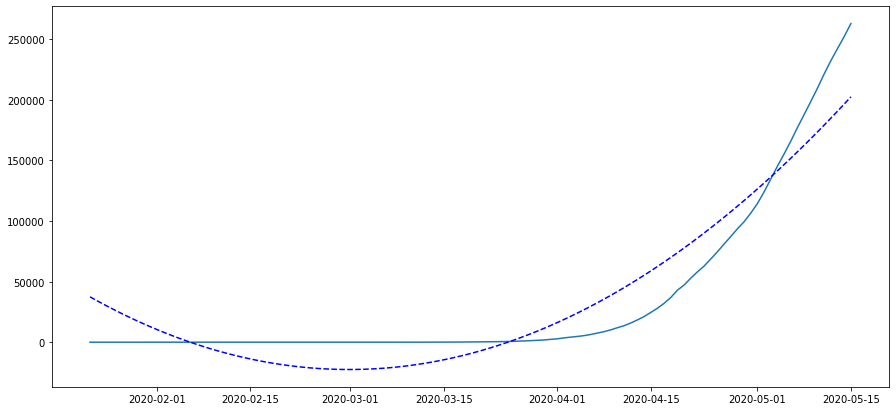

In [ ]:
#1 Just Aproximation only for Russia

import numpy as np
from datetime import datetime

sql = '''
SELECT *
FROM df_train
WHERE Country_Region = "Russia"
GROUP BY Date
'''
df_train_new_rus = select(sql, [df_train])
dta = df_train_new_rus

plt.figure(figsize=(15,7))
plt.plot(dta['Date'].values.astype('datetime64[D]'), dta['ConfirmedCases'].values)

n_data = len(dta['Date'].values.astype('datetime64[D]'))

# y = x^3*a3 + x^2*a2 + x*a1 + a0
model = np.polyfit(x = np.arange(n_data), y = np.array(dta['ConfirmedCases']), deg = 2)
polynom = np.poly1d(model)

plt.plot(dta['Date'].values.astype('datetime64[D]'), polynom( np.arange(n_data) ), 'b--')

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import ml_metrics as metrics

print ('\n\nR^2 for Russia (ConfirmedCases): %1.9f' % r2_score(dta['ConfirmedCases'], polynom( np.arange(n_data) )))
print ('\nRMSE (ml_metrics.metrics): %.9f' % metrics.rmse(dta['ConfirmedCases'], polynom( np.arange(n_data) )))
print ('RMSE (scikit-learn): %.9f' % np.sqrt(mean_squared_error(dta['ConfirmedCases'], polynom( np.arange(n_data) ))))
print ('MAE (ml_metrics.metrics): %.9f' % metrics.mae(dta['ConfirmedCases'], polynom( np.arange(n_data) )))
print ('MAE (scikit-learn): %.9f' % mean_absolute_error(dta['ConfirmedCases'], polynom( np.arange(n_data) )))



R^2: 0.881132418

RMSE (ml_metrics.metrics): 210.400733439
RMSE (scikit-learn): 210.400733439
MAE (ml_metrics.metrics): 179.474253366
MAE (scikit-learn): 179.474253366


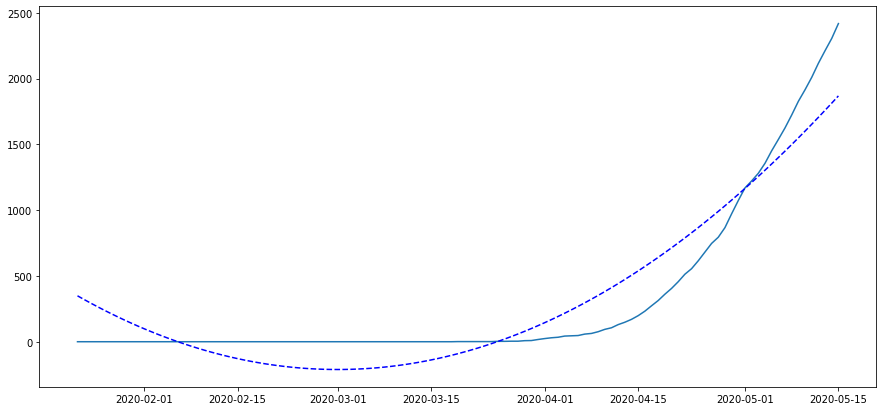

In [ ]:
#1 Just Aproximation only for Russia

import numpy as np
from datetime import datetime

sql = '''
SELECT *
FROM df_train
WHERE Country_Region = "Russia"
GROUP BY Date
'''
df_train_new_rus = select(sql, [df_train])
dta = df_train_new_rus

plt.figure(figsize=(15,7))
plt.plot(dta['Date'].values.astype('datetime64[D]'), dta['Fatalities'].values)

n_data = len(dta['Date'].values.astype('datetime64[D]'))

# y = x^3*a3 + x^2*a2 + x*a1 + a0
model = np.polyfit(x = np.arange(n_data), y = np.array(dta['Fatalities']), deg = 2)
polynom = np.poly1d(model)

plt.plot(dta['Date'].values.astype('datetime64[D]'), polynom( np.arange(n_data) ), 'b--')

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import ml_metrics as metrics

print ('\n\nR^2 for Russia (Fatalities): %1.9f' % r2_score(dta['Fatalities'], polynom( np.arange(n_data) )))
print ('\nRMSE (ml_metrics.metrics): %.9f' % metrics.rmse(dta['Fatalities'], polynom( np.arange(n_data) )))
print ('RMSE (scikit-learn): %.9f' % np.sqrt(mean_squared_error(dta['Fatalities'], polynom( np.arange(n_data) ))))
print ('MAE (ml_metrics.metrics): %.9f' % metrics.mae(dta['Fatalities'], polynom( np.arange(n_data) )))
print ('MAE (scikit-learn): %.9f' % mean_absolute_error(dta['Fatalities'], polynom( np.arange(n_data) )))